In [6]:
import numpy as np
import pandas as pd
from Kernels.GaussianKernel import GaussianKernel
from base.Layers import PatternLayer, SummationLayerPNN
from base.Layers.RegularizationLayer import RegularizationLayer
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from base.Layers.OutputLayerPNN import OutputLayerPNN
from PNN import PNN
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
X, y = make_classification(
    n_samples=30,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=2,
    class_sep=1,
    random_state=300
)

X = np.round(X * 10, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

df = pd.DataFrame(X_train, columns=['Feature 1', 'Feature 2'])
df['Class'] = y_train


print(df.sort_values(by='Class', ignore_index=True).astype(int).to_latex())

\begin{tabular}{lrrr}
\toprule
 & Feature 1 & Feature 2 & Class \\
\midrule
0 & -22 & -19 & 0 \\
1 & -15 & -13 & 0 \\
2 & -9 & -7 & 0 \\
3 & -5 & -4 & 0 \\
4 & -11 & -10 & 0 \\
5 & -14 & -9 & 0 \\
6 & -10 & -6 & 0 \\
7 & -24 & -24 & 0 \\
8 & 4 & 0 & 1 \\
9 & 0 & -10 & 1 \\
10 & 9 & -6 & 1 \\
11 & 22 & -2 & 1 \\
12 & 4 & -7 & 1 \\
13 & 2 & -13 & 1 \\
14 & 17 & -16 & 1 \\
\bottomrule
\end{tabular}



In [8]:
input_vec = np.array([-11, -7])

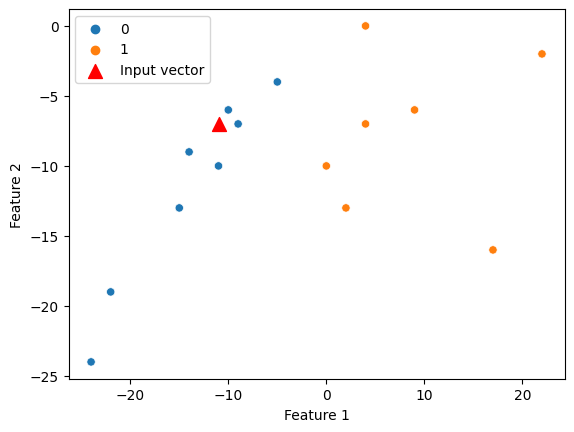

In [9]:
sns.scatterplot(df, x='Feature 1', y='Feature 2', hue='Class')
plt.scatter(input_vec[0], input_vec[1], color='red', marker='^', s=100, label='Input vector')
plt.legend()
plt.savefig('input-demo')
plt.show()


In [10]:
pattern_layer = PatternLayer(GaussianKernel(0.5))
sum_layer = SummationLayerPNN([0, 1])
reg_layer_l1 = RegularizationLayer(regularization_type='l1',
                                      tau=10)
reg_layer_l2 = RegularizationLayer(regularization_type='l2',
                                      tau=10)
output_layer = OutputLayerPNN([1, 1])

In [11]:
pattern_layer.fit(X_train, y_train)
output_layer.fit(X_train, y_train)

In [12]:
k, y, d = pattern_layer.forward(input_vec)

In [13]:
X_0 = X_train[y_train == 0]
X_1 = X_train[y_train == 1]
X = np.append(X_0, X_1, axis=0).T
pd.DataFrame({'Feature 1': X[0], 'Feature 2': X[1], 'Kernel value': k, 'Class': y, 'Distance': d})

,Feature 1,Feature 2,Kernel value,Class,Distance
0,-22.0,-19.0,6.666910e-231,0,16.278821
1,-15.0,-13.0,6.813557e-46,0,7.211103
2,-9.0,-7.0,3.354626e-04,0,2.000000
3,-5.0,-4.0,8.194013e-40,0,6.708204
4,-11.0,-10.0,1.522998e-08,0,3.000000
5,-14.0,-9.0,5.109089e-12,0,3.605551
6,-10.0,-6.0,1.831564e-02,0,1.414214
7,-24.0,-24.0,0.000000e+00,0,21.400935
8,4.0,0.0,1.015369e-238,1,16.552945
9,-0.0,-10.0,1.211810e-113,1,11.401754


In [14]:
adjusted_k_l1, y, priors_l1 = reg_layer_l1.forward(k, y, d)
adjusted_k_l2, y, priors_l2 = reg_layer_l2.forward(k, y, d)

In [15]:
data_df = pd.DataFrame({'Feature 1': np.int8(X[0]),
                        'Feature 2': np.int8(X[1]),
                        'Kernel value': k, 
                        'Distance': d,
                        'L1 Prior': priors_l1,
                        'L2 Prior': priors_l2,
                        'Weighted kernel value': adjusted_k_l1,
                        'Class': y})



In [19]:
print(data_df.drop(columns=['Kernel value', 'Weighted kernel value']).to_latex(float_format="{:.2f}".format))

\begin{tabular}{lrrrrrr}
\toprule
 & Feature 1 & Feature 2 & Distance & L1 Prior & L2 Prior & Class \\
\midrule
0 & -22 & -19 & 16.28 & 0.20 & 0.27 & 0 \\
1 & -15 & -13 & 7.21 & 0.49 & 0.77 & 0 \\
2 & -9 & -7 & 2.00 & 0.82 & 0.98 & 0 \\
3 & -5 & -4 & 6.71 & 0.51 & 0.80 & 0 \\
4 & -11 & -10 & 3.00 & 0.74 & 0.96 & 0 \\
5 & -14 & -9 & 3.61 & 0.70 & 0.94 & 0 \\
6 & -10 & -6 & 1.41 & 0.87 & 0.99 & 0 \\
7 & -24 & -24 & 21.40 & 0.12 & 0.10 & 0 \\
8 & 4 & 0 & 16.55 & 0.19 & 0.25 & 1 \\
9 & 0 & -10 & 11.40 & 0.32 & 0.52 & 1 \\
10 & 9 & -6 & 20.02 & 0.13 & 0.13 & 1 \\
11 & 22 & -2 & 33.38 & 0.04 & 0.00 & 1 \\
12 & 4 & -7 & 15.00 & 0.22 & 0.32 & 1 \\
13 & 2 & -13 & 14.32 & 0.24 & 0.36 & 1 \\
14 & 17 & -16 & 29.41 & 0.05 & 0.01 & 1 \\
\bottomrule
\end{tabular}



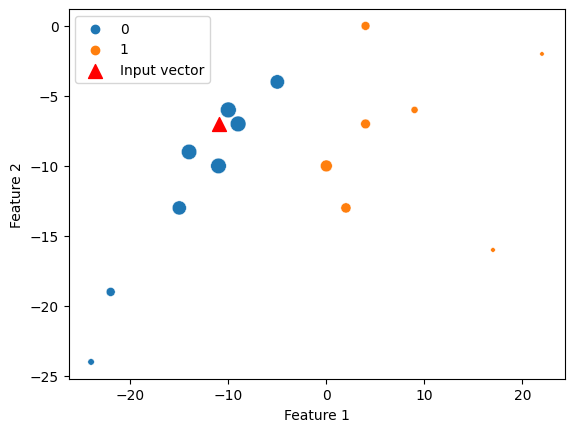

In [20]:
plot = sns.scatterplot(data=data_df,
                       x='Feature 1',
                       y='Feature 2',
                       hue='Class',
                       size=data_df['L2 Prior'],
                       sizes=(10, 130))

input_handle = plt.scatter(input_vec[0], input_vec[1],
                           color='red', marker='^', s=100,
                           label='Input vector')

handles, labels = plot.get_legend_handles_labels()

n_classes = data_df['Class'].nunique()
new_handles = handles[1:n_classes + 1]
new_labels = labels[1:n_classes + 1]

new_handles.append(input_handle)
new_labels.append('Input vector')

plt.legend(new_handles, new_labels)
plt.savefig('l2weighted')
plt.show()

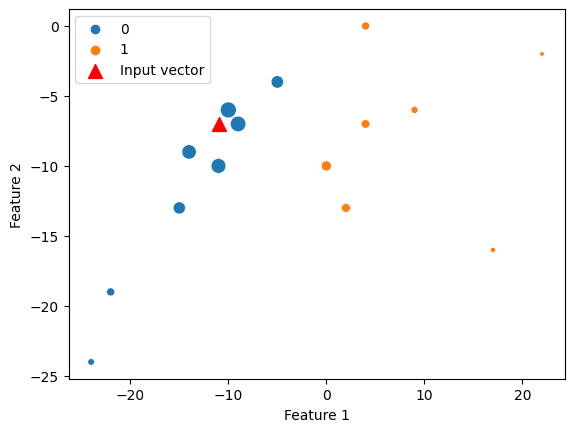

In [27]:
plot = sns.scatterplot(data=data_df,
                       x='Feature 1',
                       y='Feature 2',
                       hue='Class',
                       size=data_df['L1 Prior'],
                       sizes=(10, 130))

input_handle = plt.scatter(input_vec[0], input_vec[1],
                           color='red', marker='^', s=100,
                           label='Input vector')

handles, labels = plot.get_legend_handles_labels()

n_classes = data_df['Class'].nunique()
new_handles = handles[1:n_classes + 1]
new_labels = labels[1:n_classes + 1]

new_handles.append(input_handle)
new_labels.append('Input vector')

plt.legend(new_handles, new_labels)
plt.savefig('l1weighted')
plt.show()

In [28]:
pnn_reg = PNN(kernel='gaussian',
              sigma=0.5,
              n_classes=2,
              losses=[1, 1],
              regularization='l1',
              tau=0.5)
pnn_reg.fit(X_train, y_train)

In [29]:
preds_reg = [pnn_reg.predict(x_test) for x_test in X_test]

In [30]:
pnn = PNN(kernel='gaussian',
          sigma=0.5,
          n_classes=2,
          losses=[1, 1])
pnn.fit(X_train, y_train)

In [31]:
preds = [pnn.predict(x_test) for x_test in X_test]

In [34]:
preds

[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0]

In [36]:
preds_reg

[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0]